In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##########################
# pA Testing Starts Here #
##########################

In [3]:
monthly_pA = pd.read_csv('Resources/monthly_pA.csv',index_col=False)

In [4]:
monthly_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 5 columns):
year_month               218 non-null int64
average_exhaustion       218 non-null float64
average_sA               218 non-null float64
number_extract_points    218 non-null float64
average_pA               218 non-null float64
dtypes: float64(4), int64(1)
memory usage: 8.6 KB


In [193]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = monthly_pA[['average_exhaustion','average_sA']]
y = monthly_pA['average_pA'].values.reshape(-1,1)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [195]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [196]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [197]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [168]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [169]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [170]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.887, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.744, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.895, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.804, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.747, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.887, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=5, gamma=0.1 ..................................................
[CV] ...................... C=5, gamma=0.1, score=0.747, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.887, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.752, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.894, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.805, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.742, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.887, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [171]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 5, 'gamma': 0.001}
0.817375689835789


In [172]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [173]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.373, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.314, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.341, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.333, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.386, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.866, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=5, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=5, epsilon=0.001, gamma=0.001, score=0.755, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=5, epsilon=0.001, gamma=0.01, score=0.889, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=5, epsilon=0.001, gamma=0.01, score=0.742, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=5, epsilon=0.001, gamma=0.01, score=0.897, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=5, epsilon=0.001, gamma=0.01, score=0.801, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=5, epsilon=0.001, gamma=0.01, score=0.758, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.1 ...................................
[CV] ....... C=5, epsilon=0.001, gamma=0.1, score=0.889, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [174]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.1, 'gamma': 0.01}
0.8210422786863791


In [175]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [176]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.124, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.002, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.032, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.037, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.011, total=   0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.004, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.121, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.002, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.029, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.031, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.539, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ..............

[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.197, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.154, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.117, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.003, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.029, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.04

[CV]  C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01, score=0.878, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01, score=0.742, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01, score=0.890, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01, score=0.802, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.01, score=0.760, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.0473390629133217, degree=2, epsilon=0.01, gamma=0.1, score=0.881, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree

[CV]  C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1, score=0.875, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1, score=0.699, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1, score=0.855, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1, score=0.733, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0473390629133217, degree=4, epsilon=0.001, gamma=0.1, score=0.709, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.001, score=0.884, total=   0.0s
[CV] C=1, coef0=3.0473390629133217, de

[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.015, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.006, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.611, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.481, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.585, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.644, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.142, tot

[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.002, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.028, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.039, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.202, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.111, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.177, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.228, total=  

[CV]  C=5, coef0=3.0473390629133217, degree=3, epsilon=0.001, gamma=0.1, score=0.761, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.0473390629133217, degree=3, epsilon=0.001, gamma=0.1, score=0.708, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001, score=0.885, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001, score=0.747, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001, score=0.893, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.001, score=0.806, total=   0.0s
[CV] C=5, coef0=3.04733906291332

[CV]  C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.01, score=0.738, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.01, score=0.870, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.01, score=0.791, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.01, score=0.738, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.1, score=0.887, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=3.0473390629133217, degree=4, epsilon=0.01, gamma=0.1, score=0.744, total=   0.0s
[CV] C=5, coef0=3.0473390629133217, degree=4

[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.014, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.020, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.040, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.050, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.037, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.019, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................


[CV]  C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.001, score=0.803, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.001, score=0.760, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.01, score=0.883, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.01, score=0.755, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.0473390629133217, degree=2, epsilon=0.001, gamma=0.01, score=0.896, total=   0.0s
[CV] C=10, co

[CV]  C=10, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.1, score=0.737, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.1 
[CV]  C=10, coef0=3.0473390629133217, degree=3, epsilon=0.01, gamma=0.1, score=0.705, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001, score=0.746, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001, score=0.893, total=   0.0s
[CV] C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.0473390629133217, degree=3, epsilon=0.1, gamma=0.001, score=0.809, total=   0.0s
[CV] C=10, coef0=3.0473390629133

[CV] C=10, coef0=3.0473390629133217, degree=4, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=3.0473390629133217, degree=4, epsilon=0.1, gamma=0.1, score=0.711, total=   0.0s


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    4.3s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 3.0473390629133217],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [177]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 10, 'coef0': 3.0473390629133217, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01}
0.8213613611730747


RBF SVR yielded the best results at 0.708 while polynomial (2nd degree) was a close second at 0.706. Both have greater scores than the OLS model at 0.656. RBF will be used for Monthly pA regression

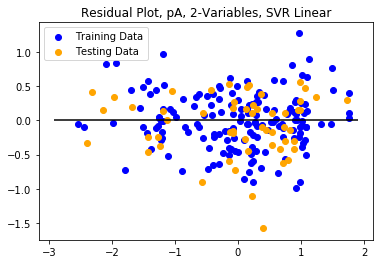

In [186]:
# Plot pA residuals based on 3-variable, RBF SVR model
model = SVR(kernel='linear', C=5, gamma=0.001)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
fig,ax1 = plt.subplots()
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pA, 2-Variables, SVR Linear')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pA_svrlinear_residual.png', dpi=96)
plt.show()

In [198]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [199]:
model = SVR(kernel='linear', C=5, gamma=0.001)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [207]:
coeffs = model.fit(X_scaled,y_array).coef_
coeffs

array([[-0.12738415,  0.82258331]])

In [209]:
coeffs = y_scaler.inverse_transform(coeffs)
coeffs

array([[0.21158085, 0.24170009]])

In [200]:
monthly_pA['Predicted_pA'] = y_predicted
monthly_pA['Error'] = monthly_pA['Predicted_pA'] - monthly_pA['average_pA']
monthly_pA.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pA,Predicted_pA,Error,datetime
0,200201,25.46,0.204,74.0,0.214,0.217189,0.003189,2002-01-01
1,200202,29.85,0.204,61.0,0.206,0.215986,0.009986,2002-02-01
2,200203,30.10,0.204,67.0,0.230,0.215918,-0.014082,2002-03-01
3,200204,31.33,0.212,75.0,0.215,0.223111,0.008111,2002-04-01
4,200205,37.39,0.212,79.0,0.205,0.221451,0.016451,2002-05-01


In [201]:
# Get a datetime column
from datetime import datetime
monthly_pA['year_month'] = monthly_pA['year_month'].astype(str)
datetime_list = []
for i in range(len(monthly_pA)):
    datetime_list.append(datetime.strptime(monthly_pA['year_month'][i],'%Y%m'))

In [202]:
monthly_pA['datetime'] = datetime_list
monthly_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 8 columns):
year_month               218 non-null object
average_exhaustion       218 non-null float64
average_sA               218 non-null float64
number_extract_points    218 non-null float64
average_pA               218 non-null float64
Predicted_pA             218 non-null float64
Error                    218 non-null float64
datetime                 218 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13.7+ KB


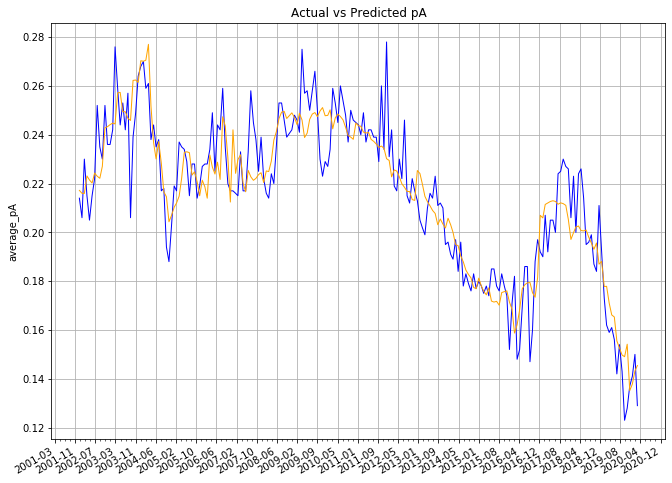

In [184]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(monthly_pA['datetime'],monthly_pA['average_pA'],c='blue',linewidth = 1)
ax1.plot(monthly_pA['datetime'],monthly_pA['Predicted_pA'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('average_pA')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pA')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/monthly_pA_svrlinear.png', dpi=100)
plt.show()

In [185]:
print("MSE for the multivariate, Linear regression: "+str(mean_squared_error(monthly_pA['average_pA'],monthly_pA['Predicted_pA'])))
print("the R2 Score for the multivariate, Linear regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, Linear regression: 0.00017061644800315162
the R2 Score for the multivariate, Linear regression: 0.8359724752630073


In [189]:
monthly_pA.to_csv('Resources/monthly_pA.csv',index=False)

In [28]:
##########################
# pB Testing Starts Here #
##########################

In [29]:
monthly_pB = pd.read_csv('Resources/monthly_pB.csv',index_col=False)

In [30]:
monthly_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
year_month               128 non-null int64
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pB               128 non-null float64
dtypes: float64(4), int64(1)
memory usage: 5.1 KB


In [105]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = monthly_pB[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pB['average_pB'].values.reshape(-1,1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [108]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [109]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [110]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [111]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [112]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.886, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.785, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.639, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.590, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.739, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.886, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [113]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
0.7295563333499353


In [114]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [115]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.260, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.271, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.163, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.052, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.257, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.810, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.474, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.705, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.858, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.788, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.667, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.592, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.728, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.1 ....................................
[CV] 

[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.888, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.784, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.675, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.607, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.740, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] ........ C=10, epsilon=0.1, gamma=0.1, score=0.914, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] ........ C=10, epsilon=0.1, gamma=0.1, score=0.829, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.3s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [116]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 5, 'epsilon': 0.1, 'gamma': 0.1}
0.7920782531618437


In [117]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [118]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=0.000, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.125, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.130, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.035, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.002, total=   0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=0.709, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=0.620, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=0.518, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=0.373, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=0.645, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=

[CV] C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01, score=0.790, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01, score=0.673, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01, score=0.579, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.01, score=0.731, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.1, score=0.893, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.1,

[CV] C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.759, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.694, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.554, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.727, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.01, score=0.886, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.01, score=0.7

[CV]  C=1, coef0=2.717991054850889, degree=4, epsilon=0.1, gamma=0.1, score=0.689, total=   0.0s
[CV] C=1, coef0=2.717991054850889, degree=4, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=2.717991054850889, degree=4, epsilon=0.1, gamma=0.1, score=0.340, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=0.000, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.125, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.130, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=2, epsilon

[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.001, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.118, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.157, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.023, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.017, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.015, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.091, total

[CV]  C=5, coef0=2.717991054850889, degree=2, epsilon=0.001, gamma=0.1, score=0.670, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001, score=0.835, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001, score=0.774, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001, score=0.686, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001, score=0.562, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=2, epsilon=0.01, gamma=0.001, score=0.725, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree

[CV]  C=5, coef0=2.717991054850889, degree=3, epsilon=0.01, gamma=0.1, score=0.661, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=3, epsilon=0.01, gamma=0.1 .
[CV]  C=5, coef0=2.717991054850889, degree=3, epsilon=0.01, gamma=0.1, score=0.483, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.878, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.785, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.670, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.717991054850889, degree=3, epsilon=0.1, gamma=0.001, score=0.586, total=   0.0s
[CV] C=5, coef0=2.717991054850889, degree=3, epsilon=

[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.035, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.017, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.016, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.143, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.123, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.001, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1, sc

[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.505, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=0.000, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.125, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.130, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.034, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01, scor

[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.118, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.157, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.023, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.328, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.052, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.436, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.087, total=  

[CV]  C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.01, score=0.608, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.01, score=0.702, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1, score=0.859, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1, score=0.773, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1, score=0.666, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.717991054850889, degree=3, epsilon=0.001, gamma=0.1, score=0.692, total=   0.0s
[CV] C=10, coef0=2.717991054850889, d

[CV]  C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01, score=0.879, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01, score=0.771, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01, score=0.778, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01, score=0.643, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.01, score=0.677, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=10, coef0=2.717991054850889, degree=4, epsilon=0.01, gamma=0.1, score=0.896, total=   0.0s
[CV] C=10, coef0=2.717991054850889, degree

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.8s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 2.717991054850889],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [119]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 1, 'coef0': 2.717991054850889, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1}
0.7567306653521374


RBF SVR yielded the best results at 0.762 while polynomial (4th degree) was a close second at 0.745. Both have significantly greater scores than the OLS model at 0.616. RBF will be used for Monthly pB regression

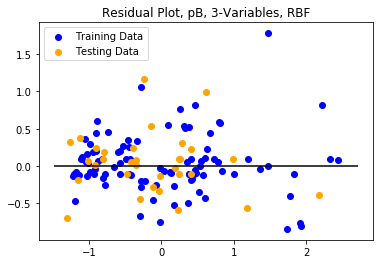

In [120]:
# Plot pB residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pB, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pB_rbf_residual.png', dpi=96)
plt.show()

In [121]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [122]:
model = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [123]:
monthly_pB['Predicted_pB'] = y_predicted
monthly_pB['Error'] = monthly_pB['Predicted_pB'] - monthly_pB['average_pB']
monthly_pB.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pB,Predicted_pB,Error,datetime
0,200908,45.33,0.243,152.0,1.464125,1.359243,-0.104882,2009-08-01
1,200909,46.52,0.244,141.0,1.472000,1.420773,-0.051227,2009-09-01
2,200910,42.35,0.241,174.0,1.319250,1.230076,-0.089174,2009-10-01
3,200911,37.27,0.242,215.0,1.285053,1.033892,-0.251160,2009-11-01
4,200912,35.62,0.243,201.0,1.344667,1.058385,-0.286282,2009-12-01


In [124]:
# Get a datetime column
from datetime import datetime
monthly_pB['year_month'] = monthly_pB['year_month'].astype(str)
datetime_list = []
for i in range(len(monthly_pB)):
    datetime_list.append(datetime.strptime(monthly_pB['year_month'][i],'%Y%m'))

In [125]:
monthly_pB['datetime'] = datetime_list
monthly_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
year_month               128 non-null object
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pB               128 non-null float64
Predicted_pB             128 non-null float64
Error                    128 non-null float64
datetime                 128 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.1+ KB


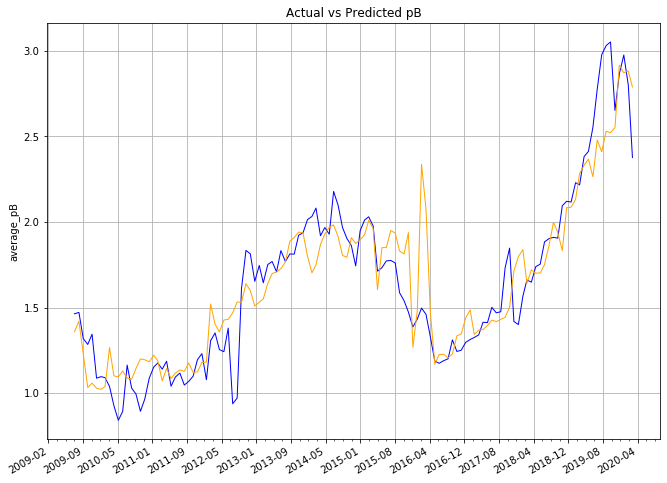

In [126]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(monthly_pB['datetime'],monthly_pB['average_pB'],c='blue',linewidth = 1)
ax1.plot(monthly_pB['datetime'],monthly_pB['Predicted_pB'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('average_pB')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pB')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/monthly_pB_rbf.png', dpi=100)
plt.show()

In [127]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(monthly_pB['average_pB'],monthly_pB['Predicted_pB'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 0.042660344405994574
the R2 Score for the multivariate, RBF regression: 0.8305186892711084


In [190]:
monthly_pB.to_csv('Resources/monthly_pB.csv',index=False)

In [54]:
##########################
# pD Testing Starts Here #
##########################

In [128]:
monthly_pD = pd.read_csv('Resources/monthly_pD.csv',index_col=False)

In [129]:
monthly_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
year_month               128 non-null int64
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pD               128 non-null float64
dtypes: float64(4), int64(1)
memory usage: 5.1 KB


In [135]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = monthly_pD[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pD['average_pD'].values.reshape(-1,1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)

In [137]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [138]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [139]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [140]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [141]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [142]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] ................... C=1, gamma=0.001, score=-0.387, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................... C=1, gamma=0.001, score=-0.391, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.504, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.067, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.221, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................... C=1, gamma=0.01, score=-0.387, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [143]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
-0.0011826909624918687


In [144]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [145]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.235, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.104, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.047, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.032, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.026, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ..... C=1, epsilon=0.001, gamma=0.01, score=-0.106, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ..... C=1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.303, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.372, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.1 ....................................
[CV] ........ C=5, epsilon=0.01, gamma=0.1, score=0.018, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.1 ....................................
[CV] ........ C=5, epsilon=0.01, gamma=0.1, score=0.806, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.1 ....................................
[CV] ........ C=5, epsilon=0.01, gamma=0.1, score=0.703, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.1 ....................................
[CV] ........ C=5, epsilon=0.01, gamma=0.1, score=0.498, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.1 ....................................
[CV] ........ C=5, epsilon=0.01, gamma=0.1, score=0.476, total=   0.0s
[CV] C=5, epsilon=0.1, gamma=0.001 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.3s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [146]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 1, 'epsilon': 0.01, 'gamma': 0.1}
0.5240829881213545


In [147]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [148]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.250, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.110, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.097, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=0.000, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.008, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.224, total=   0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.088, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.013, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.234, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.125, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.088, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[

[CV] C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001, score=-0.194, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001, score=-0.108, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001, score=0.026, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001, score=0.068, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.001, score=0.056, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=2.3525437502793705, degree=2, epsilon=0.1, gamma=0

[CV]  C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.01, score=0.442, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.113, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.641, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.716, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.448, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.173, total=   0.0s
[CV] C=1, coef0=2.3525437502793705, degree=4, epsi

[CV] C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.009, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.249, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.109, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.099, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=0.001, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.009, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................

[CV]  C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=-0.509, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.077, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.241, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.115, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.001, score=-0.129, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.001, score=-0.117, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=2.352543750279370

[CV] C=5, coef0=2.3525437502793705, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=2.3525437502793705, degree=3, epsilon=0.001, gamma=0.1, score=0.728, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=2.3525437502793705, degree=3, epsilon=0.001, gamma=0.1, score=0.457, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=2.3525437502793705, degree=3, epsilon=0.001, gamma=0.1, score=0.177, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.3525437502793705, degree=3, epsilon=0.01, gamma=0.001, score=-0.231, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.3525437502793705, degree=3, epsilon=0.01, gamma=0.001, score=-0.155, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=2.3525437502793705, degree=3, epsilon=0.01, 

[CV]  C=5, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.546, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.653, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.529, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=2.3525437502793705, degree=4, epsilon=0.01, gamma=0.1, score=0.302, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=4, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.3525437502793705, degree=4, epsilon=0.1, gamma=0.001, score=-0.283, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=4, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.3525437502793705, degree=4, epsilon=0.1, gamma=0.001, score=-0.211, total=   0.0s
[CV] C=5, coef0=2.3525437502793705, degree=4,

[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.098, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.003, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.009, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=-0.050, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=-0.283, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.243, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=

[CV]  C=10, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.1, score=0.717, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.1, score=0.523, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.3525437502793705, degree=2, epsilon=0.001, gamma=0.1, score=0.214, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=2.3525437502793705, degree=2, epsilon=0.01, gamma=0.001, score=-0.158, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=2.3525437502793705, degree=2, epsilon=0.01, gamma=0.001, score=-0.141, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=2.3525437502793705, degree=2, epsilon=0.01, gamma=0.001, score=0.374, total=   0.0s
[CV] C=10, coef0=2.35

[CV]  C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1, score=0.062, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1, score=0.613, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1, score=0.669, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1, score=0.321, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=2.3525437502793705, degree=3, epsilon=0.1, gamma=0.1, score=0.202, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=2.3525437502793705, degree=4, epsilon=0.001, gamma=0.001, score=-0.315, total=   0.0s
[CV] C=10, coef0=2.3525437502793705, degre

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.0s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 2.3525437502793705],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [149]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 5, 'coef0': 2.3525437502793705, 'degree': 4, 'epsilon': 0.001, 'gamma': 0.01}
0.4706078909552532


RBF SVR yielded the best results at 0.440 and is significantly greater than the OLS model at 0.182. RBF will be used for Monthly pD regression

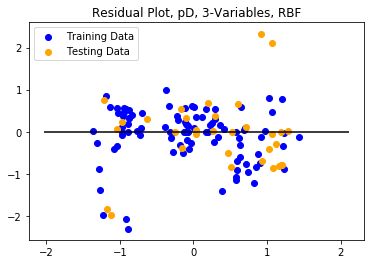

In [150]:
# Plot pD residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.01)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pD, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pD_rbf_residual.png', dpi=96)
plt.show()

In [151]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [152]:
model = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.01)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [153]:
monthly_pD['Predicted_pD'] = y_predicted
monthly_pD['Error'] = monthly_pD['Predicted_pD'] - monthly_pD['average_pD']
monthly_pD.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pD,Predicted_pD,Error
0,200908,45.33,0.243,152.0,0.017667,0.009233,-0.008434
1,200909,46.52,0.244,141.0,0.018667,0.009241,-0.009426
2,200910,42.35,0.241,174.0,0.015900,0.009169,-0.006731
3,200911,37.27,0.242,215.0,0.016556,0.008799,-0.007757
4,200912,35.62,0.243,201.0,0.016238,0.008584,-0.007654


In [154]:
# Get a datetime column
from datetime import datetime
monthly_pD['year_month'] = monthly_pD['year_month'].astype(str)
datetime_list = []
for i in range(len(monthly_pD)):
    datetime_list.append(datetime.strptime(monthly_pD['year_month'][i],'%Y%m'))

In [155]:
monthly_pD['datetime'] = datetime_list
monthly_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
year_month               128 non-null object
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pD               128 non-null float64
Predicted_pD             128 non-null float64
Error                    128 non-null float64
datetime                 128 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.1+ KB


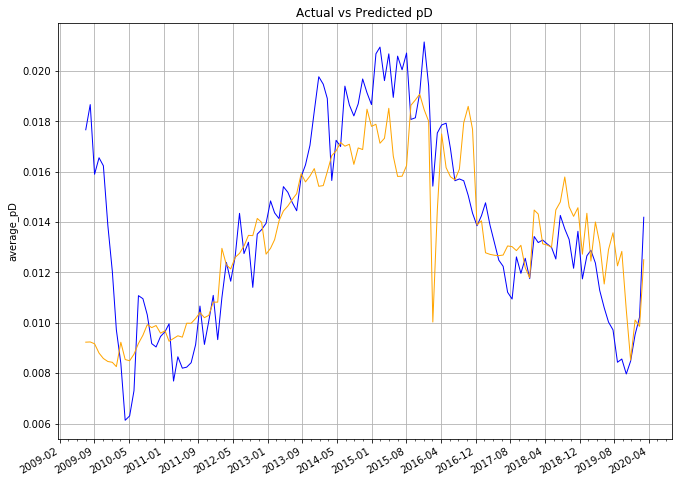

In [156]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(monthly_pD['datetime'],monthly_pD['average_pD'],c='blue',linewidth = 1)
ax1.plot(monthly_pD['datetime'],monthly_pD['Predicted_pD'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('average_pD')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pD')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/monthly_pD_rbf.png', dpi=100)
plt.show()

In [157]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(monthly_pD['average_pD'],monthly_pD['Predicted_pD'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 6.17026254032034e-06
the R2 Score for the multivariate, RBF regression: 0.5654620033250192


In [191]:
monthly_pD.to_csv('Resources/monthly_pD.csv',index=False)

In [158]:
# Considering there are timeframes of higher errors, we will plot the independent variables below the actual/predictions
# they may have been somewhat of outliers during that time

In [159]:
monthly_pA.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pA,Predicted_pA,Error,datetime
0,200201,25.46,0.204,74.0,0.214,0.215166,0.001166,2002-01-01
1,200202,29.85,0.204,61.0,0.206,0.213872,0.007872,2002-02-01
2,200203,30.10,0.204,67.0,0.230,0.213906,-0.016094,2002-03-01
3,200204,31.33,0.212,75.0,0.215,0.221303,0.006303,2002-04-01
4,200205,37.39,0.212,79.0,0.205,0.219865,0.014865,2002-05-01


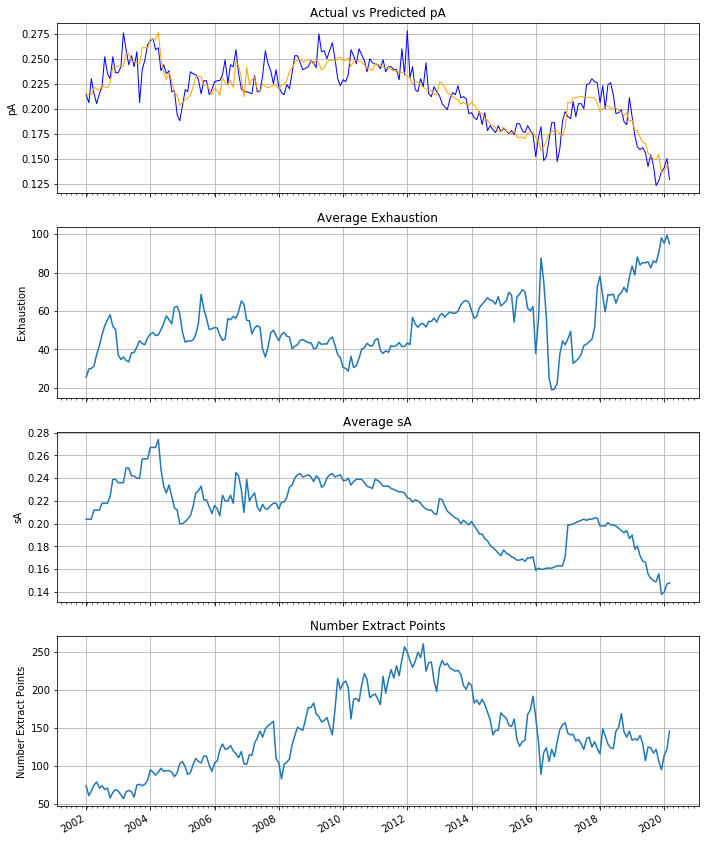

In [160]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True)
ax1.plot(monthly_pA['datetime'],monthly_pA['average_pA'],c='blue',linewidth = 1)
ax1.plot(monthly_pA['datetime'],monthly_pA['Predicted_pA'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pA')

ax2.plot(monthly_pA['datetime'],monthly_pA['average_exhaustion'])
ax2.set_ylabel('Exhaustion')
ax3.plot(monthly_pA['datetime'],monthly_pA['average_sA'])
ax3.set_ylabel('sA')
ax4.plot(monthly_pA['datetime'],monthly_pA['number_extract_points'])
ax4.set_ylabel('Number Extract Points')


fig.autofmt_xdate()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_title('Actual vs Predicted pA')
ax2.set_title('Average Exhaustion')
ax3.set_title('Average sA')
ax4.set_title('Number Extract Points')
fig.set_size_inches(11.5, 16)
fig.savefig('Images/monthly_pA_variables.png', dpi=100)
plt.show()

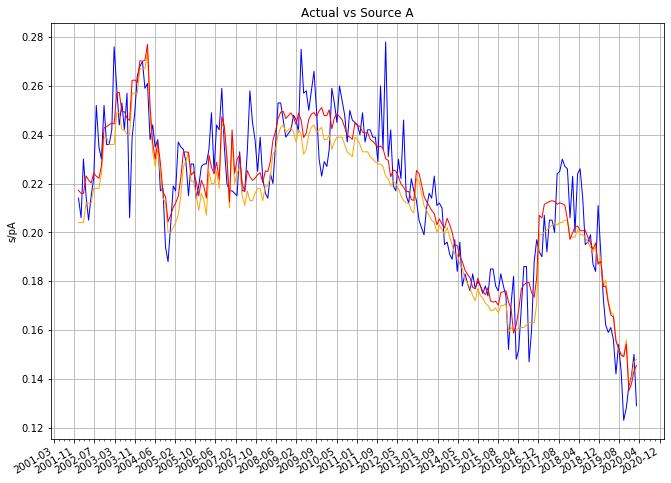

In [188]:
# A possible explanation for the large errors at certain points in time may be
# related to the sA not being correctly determined - it is a modeled, forecasted value
# and sometimes has a large variance if not updated correctly
# below is a graph of sA vs Actual pA to show how these two can vary at certain times
# note that in a perfect world, sA and pA should be identical
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(monthly_pA['datetime'],monthly_pA['average_pA'],c='blue',linewidth = 1)
ax1.plot(monthly_pA['datetime'],monthly_pA['average_sA'],c='orange',linewidth = 1)
ax1.plot(monthly_pA['datetime'],monthly_pA['Predicted_pA'],c='red',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('s/pA')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Source A')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/monthly_pA_v_sA.png', dpi=100)
plt.show()

Actual pA is in blue, sA in orange, and predicted pA in red. It is easily seen how strongly the model counts sA, however it cannot correct enough for the large spikes in actual pA

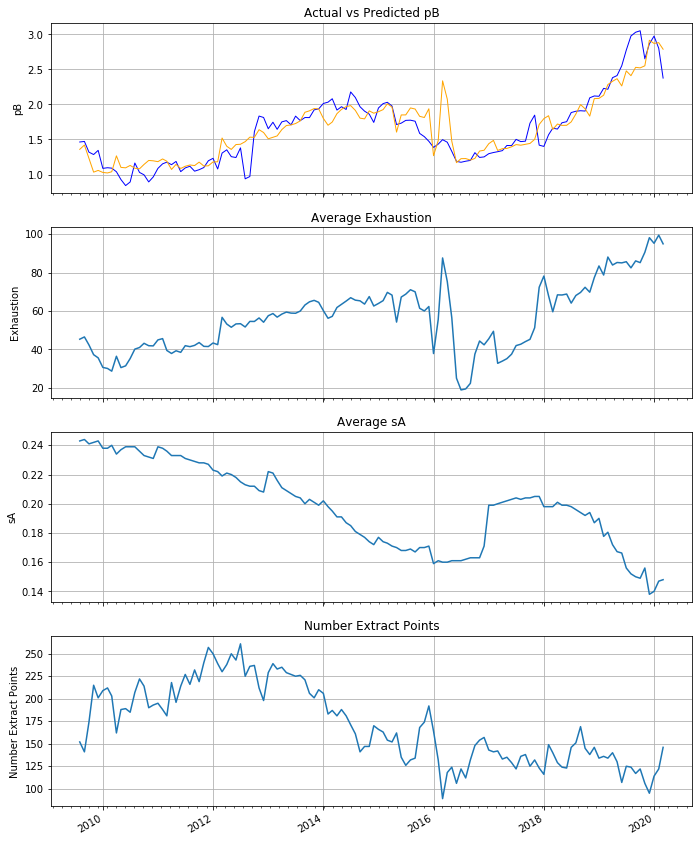

In [161]:
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True)
ax1.plot(monthly_pB['datetime'],monthly_pB['average_pB'],c='blue',linewidth = 1)
ax1.plot(monthly_pB['datetime'],monthly_pB['Predicted_pB'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pB')

ax2.plot(monthly_pB['datetime'],monthly_pB['average_exhaustion'])
ax2.set_ylabel('Exhaustion')
ax3.plot(monthly_pB['datetime'],monthly_pB['average_sA'])
ax3.set_ylabel('sA')
ax4.plot(monthly_pB['datetime'],monthly_pB['number_extract_points'])
ax4.set_ylabel('Number Extract Points')


fig.autofmt_xdate()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_title('Actual vs Predicted pB')
ax2.set_title('Average Exhaustion')
ax3.set_title('Average sA')
ax4.set_title('Number Extract Points')
fig.set_size_inches(11.5, 16)
fig.savefig('Images/monthly_pB_variables.png', dpi=100)
plt.show()

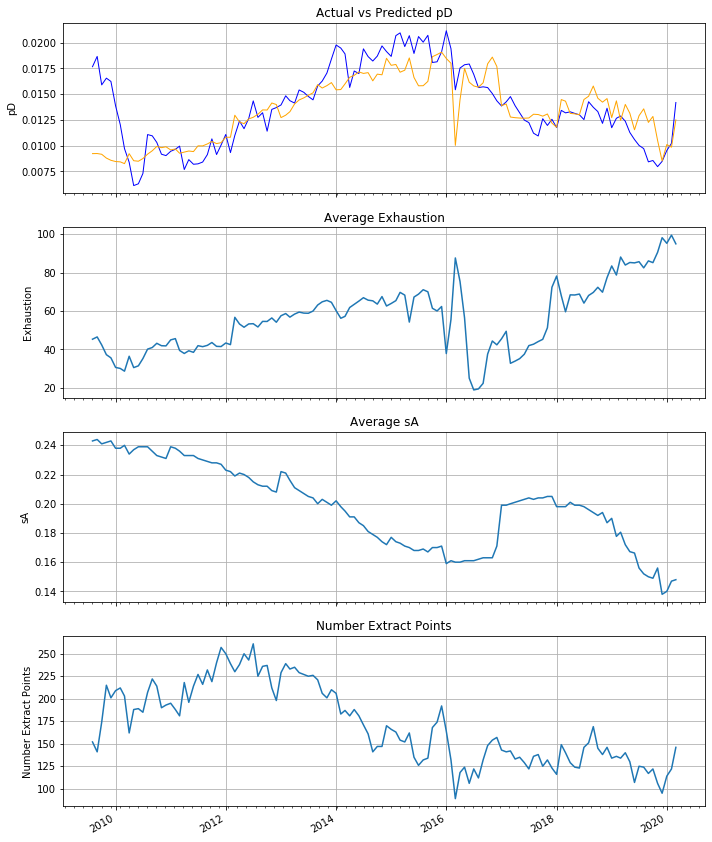

In [162]:
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True)
ax1.plot(monthly_pD['datetime'],monthly_pD['average_pD'],c='blue',linewidth = 1)
ax1.plot(monthly_pD['datetime'],monthly_pD['Predicted_pD'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pD')

ax2.plot(monthly_pD['datetime'],monthly_pD['average_exhaustion'])
ax2.set_ylabel('Exhaustion')
ax3.plot(monthly_pD['datetime'],monthly_pD['average_sA'])
ax3.set_ylabel('sA')
ax4.plot(monthly_pD['datetime'],monthly_pD['number_extract_points'])
ax4.set_ylabel('Number Extract Points')


fig.autofmt_xdate()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_title('Actual vs Predicted pD')
ax2.set_title('Average Exhaustion')
ax3.set_title('Average sA')
ax4.set_title('Number Extract Points')
fig.set_size_inches(11.5, 16)
fig.savefig('Images/monthly_pD_variables.png', dpi=100)
plt.show()